In [1]:
import os

# List all files in the current folder
os.listdir('/content')


['.config',
 'Project_score_combined_Sanger_v2_Broad_21Q2_fitness_scores_bayesian_factors_20240111.tsv',
 'sample_data']

In [2]:
import pandas as pd

# Set the correct file path
file_path = "/content/Project_score_combined_Sanger_v2_Broad_21Q2_fitness_scores_bayesian_factors_20240111.tsv"

# Read the TSV file
df = pd.read_csv(file_path, sep="\t", skiprows=4, index_col=0)

# Show first few rows
df.head()


,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 1098,Unnamed: 1099,Unnamed: 1100,Unnamed: 1101,Unnamed: 1102,Unnamed: 1103,Unnamed: 1104,Unnamed: 1105,Unnamed: 1106,Unnamed: 1107
symbol,,,,,,,,,,,,,,,,,,,,,
SHOC2,-2.886725,1.438297,-1.962681,-0.757645,5.896321,-4.343524,-3.936071,-0.321454,8.420880,1.186521,...,-0.991453,3.513350,-3.024646,-0.614674,-1.295874,0.619439,-2.450505,12.094451,0.563805,-0.986187
NDUFA12,-2.090611,-1.804637,-4.635780,-3.354879,-0.524970,-3.433590,-3.254228,-4.294765,-4.603002,-3.461631,...,-2.711216,-2.026238,-0.239538,-3.686408,-1.325144,-0.644554,-0.082748,-3.865540,-4.541024,-1.957005
SDAD1,3.629103,10.826865,7.164109,7.570433,8.411831,2.549277,6.624734,5.511653,10.002429,15.770140,...,6.315442,5.496482,9.638240,2.861210,3.852589,7.365158,3.602195,25.150583,10.342452,7.069657
FAM98A,-1.497354,-4.110268,-4.731299,-6.771505,-3.222718,0.450640,-5.355525,-5.050130,-4.274131,-3.775691,...,-4.964199,-3.077355,-2.392529,-3.706384,-3.890190,-1.164276,-5.017620,1.055537,-4.417222,-2.020223
ZNF253,0.033239,-2.329164,-3.112877,-0.542493,0.372970,-1.320984,-2.076306,-0.433404,-2.168260,-2.038487,...,-4.103390,-2.548350,-2.569358,-3.160315,-2.916280,-2.814779,-3.243669,1.552628,-1.677845,-1.799420


In [3]:
import pandas as pd

# Load the file
df = pd.read_csv("/content/Project_score_combined_Sanger_v2_Broad_21Q2_fitness_scores_bayesian_factors_20240111.tsv", sep="\t", skiprows=4, index_col=0)

# Show shape of the data
print("Data shape:", df.shape)

# Show first 5 rows
print(df.head())

# Check if there are missing values
print("\nMissing values per column:\n", df.isnull().sum().sort_values(ascending=False).head(10))


Data shape: (16506, 1107)
         Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
symbol                                                                
SHOC2     -2.886725    1.438297   -1.962681   -0.757645    5.896321   
NDUFA12   -2.090611   -1.804637   -4.635780   -3.354879   -0.524970   
SDAD1      3.629103   10.826865    7.164109    7.570433    8.411831   
FAM98A    -1.497354   -4.110268   -4.731299   -6.771505   -3.222718   
ZNF253     0.033239   -2.329164   -3.112877   -0.542493    0.372970   

         Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  ...  \
symbol                                                                ...   
SHOC2     -4.343524   -3.936071   -0.321454    8.420880     1.186521  ...   
NDUFA12   -3.433590   -3.254228   -4.294765   -4.603002    -3.461631  ...   
SDAD1      2.549277    6.624734    5.511653   10.002429    15.770140  ...   
FAM98A     0.450640   -5.355525   -5.050130   -4.274131    -3.775691  ...   
ZNF253    -1.3

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Drop columns with missing values
df_clean = df.dropna(axis=1)

# Convert DataFrame to numpy format
X = df_clean.values  # all features
y = df_clean.mean(axis=1).values  # target = average fitness impact for each gene

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Ridge Regression model
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")


Mean Squared Error: 0.0000


In [5]:
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (13204, 738) (13204,)
Test shape: (3302, 738) (3302,)


In [7]:
for i in range(20):
    print(f"Predicted: {y_pred[i]:.5f}  |  Actual: {y_test[i]:.5f}")


Predicted: -3.26551  |  Actual: -3.26551
Predicted: -4.23425  |  Actual: -4.23425
Predicted: -3.29638  |  Actual: -3.29638
Predicted: -2.45164  |  Actual: -2.45164
Predicted: -4.54526  |  Actual: -4.54527
Predicted: -2.82140  |  Actual: -2.82140
Predicted: -4.15085  |  Actual: -4.15085
Predicted: -3.83426  |  Actual: -3.83426
Predicted: 0.15469  |  Actual: 0.15469
Predicted: -2.32438  |  Actual: -2.32439
Predicted: -3.96937  |  Actual: -3.96937
Predicted: -1.35650  |  Actual: -1.35650
Predicted: -1.96129  |  Actual: -1.96129
Predicted: -3.61708  |  Actual: -3.61709
Predicted: -3.32388  |  Actual: -3.32388
Predicted: -3.13599  |  Actual: -3.13599
Predicted: -2.40268  |  Actual: -2.40268
Predicted: -5.06664  |  Actual: -5.06663
Predicted: -3.51916  |  Actual: -3.51916
Predicted: -4.35408  |  Actual: -4.35408


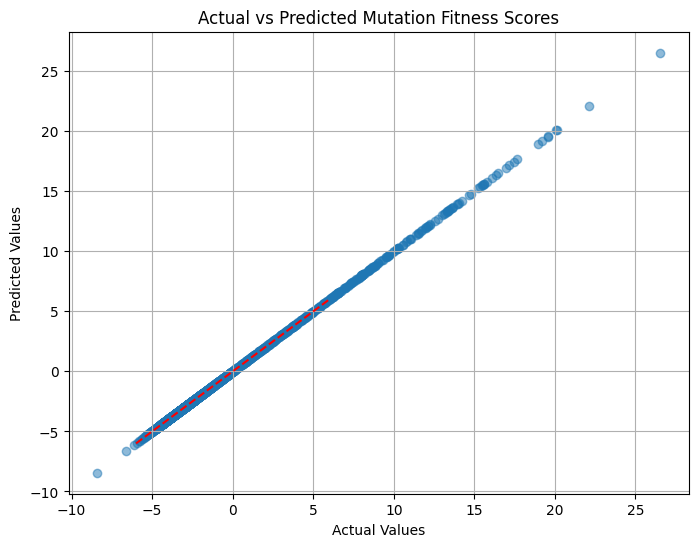

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Mutation Fitness Scores")
plt.plot([-6, 6], [-6, 6], 'r--')  # diagonal reference line
plt.grid(True)
plt.show()


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Mutation Impact")
plt.ylabel("Predicted Impact")
plt.title("Prediction Accuracy")
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd

# Load data
df = pd.read_csv("Project_score_combined_Sanger_v2_Broad_21Q2_fitness_scores_bayesian_factors_20240111.tsv", sep='\t', index_col=0, low_memory=False)

# Check which columns are non-numeric
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(f"🧾 Non-numeric columns: {list(non_numeric_cols)}")


🧾 Non-numeric columns: ['WERI-RB-1 ', 'OVCAR-8', 'UM-UC-10', 'PE-CA-PJ15', 'NCI-H1793', 'SCMC-RM2', 'SW620', 'THUR14TKB', 'Calu-6', 'HCC-827', 'A375', 'JAR', 'SSP-25', 'NCI-H1693', 'OVISE', 'CHP-212', 'NCI-H1155', 'NP-3', 'C80', 'RERF-LC-AI', 'GCIY', 'Farage', 'SNU-398', 'COV413A', 'F-36P', 'NCI-H446', 'CAL-33', 'TO14', 'HCC461', 'NCI-H1944', 'NB1', 'MYLA', 'U251', 'NCI-H82', '639-V', 'LN-464', 'SNU-1077', 'COR-L279', 'NP-8', 'HT-1376', 'SH-4', 'LXF-289', 'OV-90', 'Hs-294-T', 'YKG-1', 'OC-316', 'Hep-G2', 'COG-N-278', 'U-937', 'CAL-78', 'UM-UC-3', 'Mero-82', 'JHH-2', 'TC-106', 'UM-UC-5', 'SK-GT-4', 'CH-157MN', 'UOK101', 'OE21', 'CAL-120', 'LN-428', 'U-87-MG', 'ACC-MESO-1', 'KU-19-19', 'NCI-H1092', 'DLD-1', 'NCI-H716', 'NCI-H358', 'SNU-410', 'KNS-42', 'MPP-89', 'SKN', 'HSC-1', 'SW1463', 'COR-L105', 'LPS853', 'KM12', 'NCI-H322M', 'KYSE-270', 'H4', 'KMS-11', 'CAL-51', 'SK-RC-20', 'HCC202', 'SK-MEL-24', 'NCI-H2126', 'DU-4475', 'SNU-840', 'PFSK-1', 'REH', 'D-425MED', 'KNS-60', 'SK-NEP-1', 'N

In [5]:
print(df_numeric.shape)
print(df_clean.shape)
print(df_numeric.head())


(17651, 0)
(17651, 0)
Empty DataFrame
Columns: []
Index: [model_id, source, qc_pass, symbol, SHOC2]


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Load
df = pd.read_csv("Project_score_combined_Sanger_v2_Broad_21Q2_fitness_scores_bayesian_factors_20240111.tsv", sep="\t", index_col=0, low_memory=False)

# Convert all to numeric, then reduce to float32
df = df.apply(pd.to_numeric, errors='coerce').astype(np.float32)

# Drop rows with missing target (first column)
target_column = df.columns[0]
df = df.dropna(subset=[target_column])

# Features & target (limit features for speed)
X = df.drop(columns=[target_column]).iloc[:, :200]
y = df[target_column]

# Impute missing
X = SimpleImputer(strategy='mean').fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use smaller RF for speed
model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("✅ MSE:", mean_squared_error(y_test, y_pred))


✅ MSE: 1.8605263392248403


In [2]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


MAE: 0.9417
R² Score: 0.7347


In [7]:
!ls


Project_score_combined_Sanger_v2_Broad_21Q2_fitness_scores_bayesian_factors_20240111.tsv
random_forest_model.pkl
sample_data


In [14]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Project_score_combined_Sanger_v2_Broad_21Q2_fitness_scores_bayesian_factors_20240111.tsv", sep="\t", index_col=0, low_memory=False)

# Print column names to find your target column
print("Columns in dataset:")
print(df.columns.tolist())


Columns in dataset:
['WERI-RB-1 ', 'OVCAR-8', 'UM-UC-10', 'PE-CA-PJ15', 'NCI-H1793', 'SCMC-RM2', 'SW620', 'THUR14TKB', 'Calu-6', 'HCC-827', 'A375', 'JAR', 'SSP-25', 'NCI-H1693', 'OVISE', 'CHP-212', 'NCI-H1155', 'NP-3', 'C80', 'RERF-LC-AI', 'GCIY', 'Farage', 'SNU-398', 'COV413A', 'F-36P', 'NCI-H446', 'CAL-33', 'TO14', 'HCC461', 'NCI-H1944', 'NB1', 'MYLA', 'U251', 'NCI-H82', '639-V', 'LN-464', 'SNU-1077', 'COR-L279', 'NP-8', 'HT-1376', 'SH-4', 'LXF-289', 'OV-90', 'Hs-294-T', 'YKG-1', 'OC-316', 'Hep-G2', 'COG-N-278', 'U-937', 'CAL-78', 'UM-UC-3', 'Mero-82', 'JHH-2', 'TC-106', 'UM-UC-5', 'SK-GT-4', 'CH-157MN', 'UOK101', 'OE21', 'CAL-120', 'LN-428', 'U-87-MG', 'ACC-MESO-1', 'KU-19-19', 'NCI-H1092', 'DLD-1', 'NCI-H716', 'NCI-H358', 'SNU-410', 'KNS-42', 'MPP-89', 'SKN', 'HSC-1', 'SW1463', 'COR-L105', 'LPS853', 'KM12', 'NCI-H322M', 'KYSE-270', 'H4', 'KMS-11', 'CAL-51', 'SK-RC-20', 'HCC202', 'SK-MEL-24', 'NCI-H2126', 'DU-4475', 'SNU-840', 'PFSK-1', 'REH', 'D-425MED', 'KNS-60', 'SK-NEP-1', 'NCI-

In [15]:
target_column = 'A375'  # melanoma cell line


In [16]:
df.isna().sum().sort_values()


,0
ORL-215,1
ORL-214,1
ORL-207,1
ORL-204,1
ORL-174,1
...,...
NP-3,1
NCI-H1155,1
ORL-188,1
ORL-195,1


In [19]:
import pandas as pd

# Load data
df = pd.read_csv('Project_score_combined_Sanger_v2_Broad_21Q2_fitness_scores_bayesian_factors_20240111.tsv', sep='\t', index_col=0)

# Option 1: Choose a single cell line (e.g., A375)
target_column = 'A375'
y = df[target_column]

# Option 2: Average across all cell lines
# df['mean_fitness_score'] = df.mean(axis=1)
# y = df['mean_fitness_score']


<ipython-input-19-43c0106af374>:4: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,26

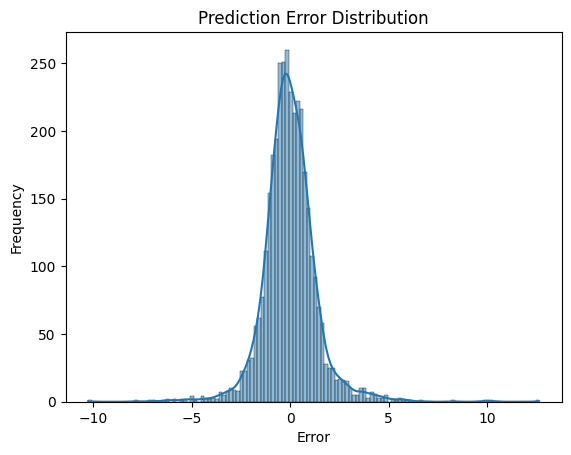

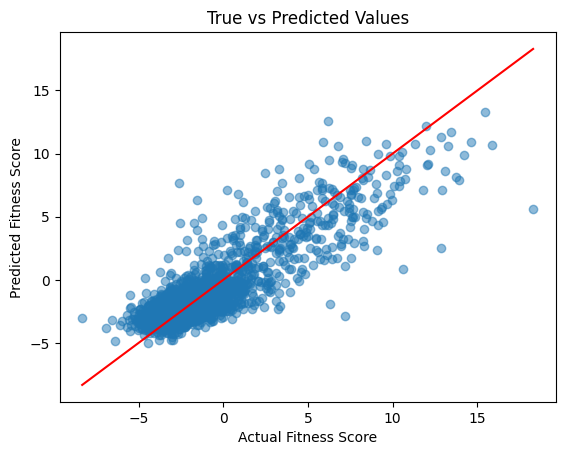

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Error distribution
errors = y_test - y_pred
sns.histplot(errors, kde=True)
plt.title("Prediction Error Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

# True vs Predicted
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Fitness Score")
plt.ylabel("Predicted Fitness Score")
plt.title("True vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Line y=x
plt.show()


In [7]:
import joblib

joblib.dump(model, 'mutation_fitness_predictor.pkl')


['mutation_fitness_predictor.pkl']

In [10]:
import pandas as pd

# Load your dataset
df = pd.read_csv('Project_score_combined_Sanger_v2_Broad_21Q2_fitness_scores_bayesian_factors_20240111.tsv', sep='\t', index_col=0)


<ipython-input-10-46e26a9adbba>:4: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,26

In [12]:
print(df.columns.tolist())


['WERI-RB-1 ', 'OVCAR-8', 'UM-UC-10', 'PE-CA-PJ15', 'NCI-H1793', 'SCMC-RM2', 'SW620', 'THUR14TKB', 'Calu-6', 'HCC-827', 'A375', 'JAR', 'SSP-25', 'NCI-H1693', 'OVISE', 'CHP-212', 'NCI-H1155', 'NP-3', 'C80', 'RERF-LC-AI', 'GCIY', 'Farage', 'SNU-398', 'COV413A', 'F-36P', 'NCI-H446', 'CAL-33', 'TO14', 'HCC461', 'NCI-H1944', 'NB1', 'MYLA', 'U251', 'NCI-H82', '639-V', 'LN-464', 'SNU-1077', 'COR-L279', 'NP-8', 'HT-1376', 'SH-4', 'LXF-289', 'OV-90', 'Hs-294-T', 'YKG-1', 'OC-316', 'Hep-G2', 'COG-N-278', 'U-937', 'CAL-78', 'UM-UC-3', 'Mero-82', 'JHH-2', 'TC-106', 'UM-UC-5', 'SK-GT-4', 'CH-157MN', 'UOK101', 'OE21', 'CAL-120', 'LN-428', 'U-87-MG', 'ACC-MESO-1', 'KU-19-19', 'NCI-H1092', 'DLD-1', 'NCI-H716', 'NCI-H358', 'SNU-410', 'KNS-42', 'MPP-89', 'SKN', 'HSC-1', 'SW1463', 'COR-L105', 'LPS853', 'KM12', 'NCI-H322M', 'KYSE-270', 'H4', 'KMS-11', 'CAL-51', 'SK-RC-20', 'HCC202', 'SK-MEL-24', 'NCI-H2126', 'DU-4475', 'SNU-840', 'PFSK-1', 'REH', 'D-425MED', 'KNS-60', 'SK-NEP-1', 'NCI-H23', 'PaCaDD-161', 